### Feature Engineering

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
df=pd.read_csv(r'data\tips.csv')
df

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [5]:
from sklearn.model_selection import train_test_split
x=df[['total_bill','sex','smoker','day','time','size']]
y=df.tip

In [6]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=99)
x_train

,total_bill,sex,smoker,day,time,size
189,23.10,Male,Yes,Sun,Dinner,3
14,14.83,Female,No,Sun,Dinner,2
220,12.16,Male,Yes,Fri,Lunch,2
101,15.38,Female,Yes,Fri,Dinner,2
82,10.07,Female,No,Thur,Lunch,1
...,...,...,...,...,...,...
201,12.74,Female,Yes,Thur,Lunch,2
168,10.59,Female,Yes,Sat,Dinner,2
185,20.69,Male,No,Sun,Dinner,5
35,24.06,Male,No,Sat,Dinner,3


In [7]:
x_test

,total_bill,sex,smoker,day,time,size
183,23.17,Male,Yes,Sun,Dinner,4
37,16.93,Female,No,Sat,Dinner,3
138,16.00,Male,Yes,Thur,Lunch,2
148,9.78,Male,No,Thur,Lunch,2
145,8.35,Female,No,Thur,Lunch,2
...,...,...,...,...,...,...
16,10.33,Female,No,Sun,Dinner,3
63,18.29,Male,Yes,Sat,Dinner,4
106,20.49,Male,Yes,Sat,Dinner,2
173,31.85,Male,Yes,Sun,Dinner,2


In [8]:
y_train

189    4.00
14     3.02
220    2.20
101    3.00
82     1.83
       ... 
201    2.01
168    1.61
185    5.00
35     3.60
129    2.18
Name: tip, Length: 183, dtype: float64

In [9]:
y_test

183    6.50
37     3.07
138    2.00
148    1.73
145    1.50
       ... 
16     1.67
63     3.76
106    4.06
173    3.18
126    1.48
Name: tip, Length: 61, dtype: float64

In [10]:
from sklearn.preprocessing import OrdinalEncoder
o1=OrdinalEncoder()
o1.fit(x_train[['sex','smoker','day','time']])
x_train[['sex','smoker','day','time']]=o1.transform(x_train[['sex','smoker','day','time']])
x_test[['sex','smoker','day','time']]=o1.transform(x_test[['sex','smoker','day','time']])


In [11]:
x_train

,total_bill,sex,smoker,day,time,size
189,23.10,1.0,1.0,2.0,0.0,3
14,14.83,0.0,0.0,2.0,0.0,2
220,12.16,1.0,1.0,0.0,1.0,2
101,15.38,0.0,1.0,0.0,0.0,2
82,10.07,0.0,0.0,3.0,1.0,1
...,...,...,...,...,...,...
201,12.74,0.0,1.0,3.0,1.0,2
168,10.59,0.0,1.0,1.0,0.0,2
185,20.69,1.0,0.0,2.0,0.0,5
35,24.06,1.0,0.0,1.0,0.0,3


In [12]:
x_test

,total_bill,sex,smoker,day,time,size
183,23.17,1.0,1.0,2.0,0.0,4
37,16.93,0.0,0.0,1.0,0.0,3
138,16.00,1.0,1.0,3.0,1.0,2
148,9.78,1.0,0.0,3.0,1.0,2
145,8.35,0.0,0.0,3.0,1.0,2
...,...,...,...,...,...,...
16,10.33,0.0,0.0,2.0,0.0,3
63,18.29,1.0,1.0,1.0,0.0,4
106,20.49,1.0,1.0,1.0,0.0,2
173,31.85,1.0,1.0,2.0,0.0,2


In [13]:
from sklearn.linear_model import LinearRegression
lr_obj = LinearRegression()
lr_obj.fit(x_train,y_train)
y_predicted=lr_obj.predict(x_test)

In [14]:
rs=pd.DataFrame({'Test':y_test.values,'Pred':y_predicted})
rs

,Test,Pred
0,6.50,3.369018
1,3.07,2.804911
2,2.00,2.502807
3,1.73,2.075735
4,1.50,1.914403
...,...,...
56,1.67,2.184562
57,3.76,2.930559
58,4.06,2.898718
59,3.18,3.934830


In [15]:
type(y_predicted)

numpy.ndarray

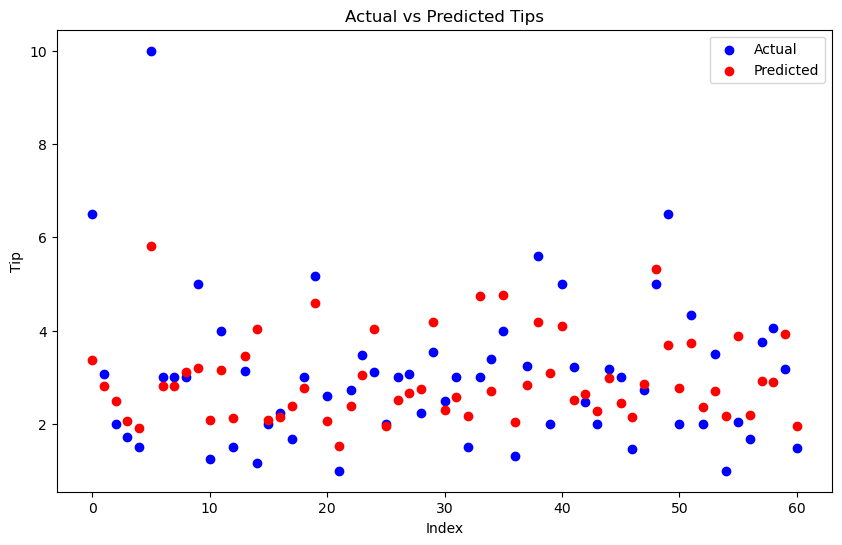

In [16]:
plt.figure(figsize=(10, 6))
plt.scatter(rs.index, rs['Test'], color='blue', label='Actual')
plt.scatter(rs.index, rs['Pred'], color='red', label='Predicted')
plt.xlabel('Index')
plt.ylabel('Tip')
plt.legend()
plt.title('Actual vs Predicted Tips')
plt.show()

# Mean absolute error(Total absolute error value)=sum of all values(y_test - y_pred)
# mean squared error=[sum of all values(y_test - y_pred)^2]/n
# r2-score= 1-((y_test - y_pred)/y_test - y_testmean))

In [18]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [19]:
print( mean_absolute_error(y_test,y_predicted))

0.7766972953189106


In [20]:
print (mean_squared_error(y_test,y_predicted))

1.2074375541903635


In [21]:
print(r2_score(y_test,y_predicted))

0.4999312328857095


In [22]:
y_test.values.max()

10.0

In [23]:
y_test.values.min()

1.0

In [24]:
y_test.mean()

3.015081967213114

In [25]:
y_test.std()

1.5667754816297277

In [26]:
y_predicted.max()

5.812523281137597

In [27]:
y_predicted.min()

1.521423482824137

In [28]:
dftrain=x_train.copy()

In [29]:
dftrain.corrwith(y_train)

total_bill    0.663742
sex           0.088643
smoker       -0.071484
day          -0.005654
time         -0.124917
size          0.482647
dtype: float64

In [91]:
x1=x_train[['total_bill']]
x1

,total_bill
189,23.10
14,14.83
220,12.16
101,15.38
82,10.07
...,...
201,12.74
168,10.59
185,20.69
35,24.06


In [31]:
print(y_train)

189    4.00
14     3.02
220    2.20
101    3.00
82     1.83
       ... 
201    2.01
168    1.61
185    5.00
35     3.60
129    2.18
Name: tip, Length: 183, dtype: float64


In [32]:
x2=x_test[['total_bill']]

In [33]:
lr_obj1 = LinearRegression()
lr_obj1.fit(x1,y_train)
y1=lr_obj1.predict(x2)

In [34]:
rs1=pd.DataFrame({'Test':y_test.values,'Pred':y1})
rs1

,Test,Pred
0,6.50,3.322753
1,3.07,2.695922
2,2.00,2.602500
3,1.73,1.977679
4,1.50,1.834030
...,...,...
56,1.67,2.032928
57,3.76,2.832539
58,4.06,3.053537
59,3.18,4.194690


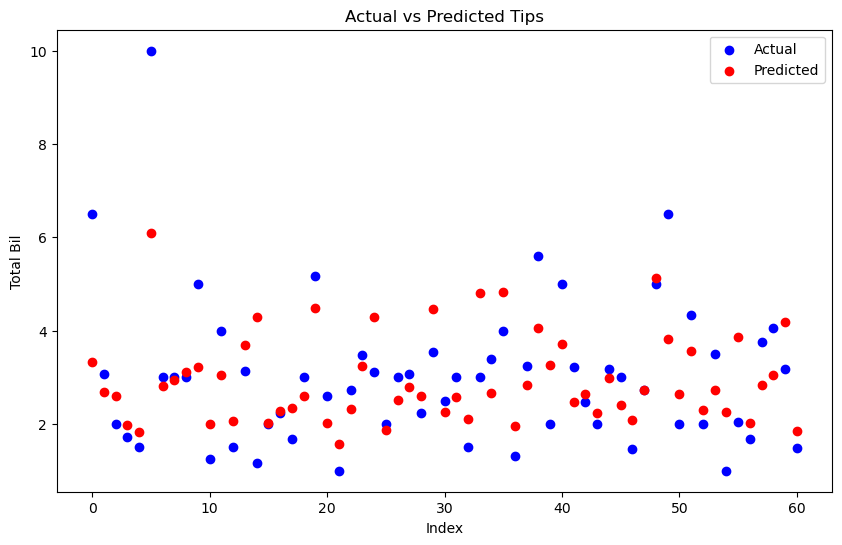

In [35]:
plt.figure(figsize=(10, 6))
plt.scatter(rs.index,rs1['Test'], color='blue', label='Actual')
plt.scatter(rs.index, rs1['Pred'], color='red', label='Predicted')
plt.xlabel('Index')
plt.ylabel('Total Bil')
plt.legend()
plt.title('Actual vs Predicted Tips')
plt.show()

In [36]:
print( mean_absolute_error(y_test,y1))

0.7889477734487897


In [37]:
print (mean_squared_error(y_test,y1))

1.2360640396020388


In [38]:
print(r2_score(y_test,y1))

0.4880753723346182


In [39]:
dftrain1=x1.copy()
dftrain1

,total_bill
189,23.10
14,14.83
220,12.16
101,15.38
82,10.07
...,...
201,12.74
168,10.59
185,20.69
35,24.06


In [40]:
dftrain1.corrwith(y_train)

total_bill    0.663742
dtype: float64

In [41]:
from sklearn.preprocessing import PolynomialFeatures

pf= PolynomialFeatures(degree=5)
x3=pf.fit_transform(x1)
x4=pf.transform(x2)

In [42]:
lr_obj2 = LinearRegression()
lr_obj2.fit(x3,y_train)
y2=lr_obj2.predict(x4)

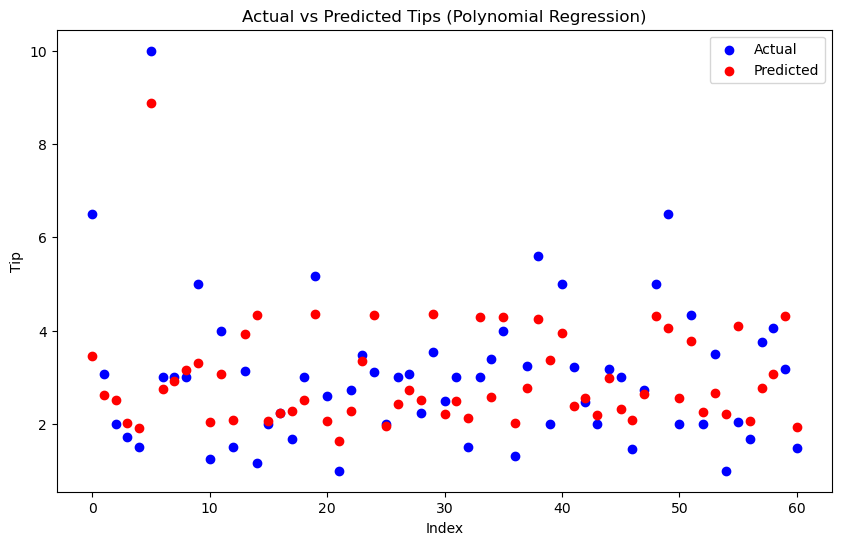

In [43]:

rs_poly = pd.DataFrame({'Test': y_test.values, 'Pred': y2})

plt.figure(figsize=(10, 6))
plt.scatter(rs_poly.index, rs_poly['Test'], color='blue', label='Actual')
plt.scatter(rs_poly.index, rs_poly['Pred'], color='red', label='Predicted')
plt.xlabel('Index')
plt.ylabel('Tip')
plt.legend()
plt.title('Actual vs Predicted Tips (Polynomial Regression)')
plt.show()


In [44]:
mp = mean_absolute_error(y_test, y2)
msp = mean_squared_error(y_test, y2)
r2p = r2_score(y_test, y2)

In [45]:
mp

0.7440623399585339

In [46]:
msp

0.9684170072033882

In [47]:
r2p

0.5989232758546792